In [2]:
FIGURE_WIDTH = 8
FIGURE_HEIGHT = 4
LEGEND_FONT_SIZE = 12
LABELS_FONT_SIZE = 18
TICK_FONT_SIZE = 14
TITLE_FONT_SIZE = 18

## Figure 1(a) and (b)
- (a) Compares different activation functions
- (b) Difference between ReLU and WSiLU

/tmp/ipykernel_929413/3658411464.py:6: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


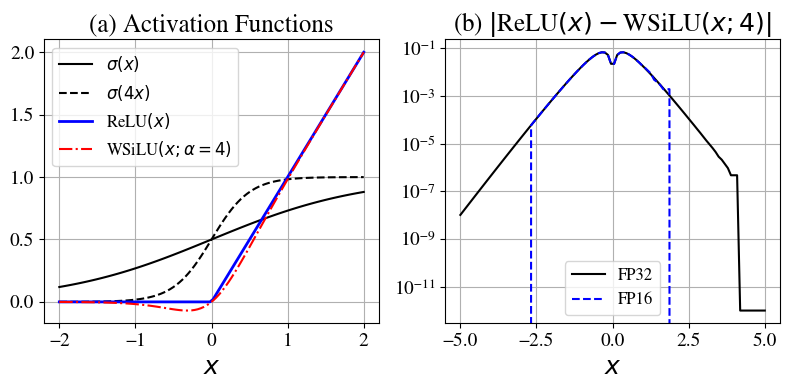

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Definições em NumPy -----
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def relu(x):
    return np.maximum(0.0, x)

def wsilu(x, alpha=4.0):
    return x * sigmoid(alpha * x)

eps = 1e-12  # evita log(0) na segunda figura

plt.figure(figsize=(FIGURE_WIDTH, FIGURE_HEIGHT))
plt.rcParams["font.family"] = "Nimbus Roman"

# (a) Curvas das ativações
plt.subplot(1, 2, 1)
x = np.linspace(-2, 2, 100, dtype=np.float32)
plt.plot(x, sigmoid(x),           label="$\\sigma(x)$",        color="black")
plt.plot(x, sigmoid(4*x),         label="$\\sigma(4x)$",       color="black", linestyle="--")
plt.plot(x, relu(x),              label="ReLU$(x)$",           linewidth=2, color="blue")
plt.plot(x, wsilu(x, alpha=4.0),  label="WSiLU$(x; \\alpha=4)$", color="red", linestyle="-.")
plt.grid(True)
plt.legend(fontsize=LEGEND_FONT_SIZE)
plt.tick_params(axis='both', labelsize=TICK_FONT_SIZE)  # aumenta os ticks dos eixos
plt.xlabel("$x$", fontsize=LABELS_FONT_SIZE)
plt.title("(a) Activation Functions", fontsize=18)

# (b) Diferença |ReLU - WSiLU| em FP32 e FP16
plt.subplot(1, 2, 2)
x = np.linspace(-5, 5, 100, dtype=np.float32)

# FP32
diff_fp32 = np.abs(relu(x) - wsilu(x, alpha=4.0)) + eps

# FP16: faça o casting do input e dos resultados
x16 = x.astype(np.float16)
relu16 = relu(x16).astype(np.float16)
wsilu16 = wsilu(x16, alpha=4.0).astype(np.float16)
diff_fp16 = np.abs(relu16 - wsilu16).astype(np.float16) + eps

plt.plot(x, diff_fp32, label="FP32", color="black")
plt.plot(x, diff_fp16.astype(np.float32), label="FP16", linestyle="--", color="blue")

plt.yscale('log')
plt.grid(True)
plt.legend(fontsize=LEGEND_FONT_SIZE, loc="lower center")
plt.xlabel("$x$", fontsize=LABELS_FONT_SIZE)
plt.title("(b) $|$ReLU$(x)-$WSiLU$(x;4)|$", fontsize=TITLE_FONT_SIZE)
plt.tick_params(axis='both', labelsize=TICK_FONT_SIZE)  # aumenta os ticks dos eixos

plt.tight_layout()

plt.savefig("../paper_figures/activation_func_error.pdf", dpi=1200, bbox_inches="tight")   # formato PNG


plt.show()
